<a href="https://colab.research.google.com/github/Dipayan14-lab/CrimeClassification/blob/main/My_major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install folium
!pip install ipywidgets
!pip install pandas plotly
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import re
import pickle
import os
import pandas as pd
import re
import ipywidgets as widgets
from IPython.display import display
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import re
import nltk
nltk.data.path.append('/root/nltk_data')
nltk.download('punkt', download_dir='/root/nltk_data')
nltk.download('stopwords', download_dir='/root/nltk_data')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    from nltk.tokenize import TreebankWordTokenizer
    tokenizer = TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:


def extract_date(text):

    date_pattern = r'([A-Z][a-z]+ \d{1,2}, \d{4})'
    match = re.search(date_pattern, text)
    if match:
        return match.group(0)
    return "Unknown"

#indian_states = ["india", "andaman and nicobar islands", "delhi", "namakkal", "bangalore", "warje",
    #"andhra pradesh", "arunachal pradesh", "assam", "bihar", "chhattisgarh", "goa", "baramulla", "pushkar",
    #"gujarat", "haryana", "himachal pradesh", "jharkhand", "karnataka", "kerala",
    #"madhya pradesh", "maharashtra", "manipur", "meghalaya", "mizoram", "nagaland",
    #"odisha", "punjab", "rajasthan", "sikkim", "tamil nadu", "telangana", "tripura",
    #"uttar pradesh", "uttarakhand", "west bengal", "chennai"]

# Function to extract state from text
#def extract_state(text):
    #for state in indian_states:
        #if state.lower() in text.lower():
            #return state
    #return "Unknown"

def extract_location(text):

    lines = text.splitlines()


    if len(lines) > 0:

        return lines[0].strip()

    return "Unknown"

def extract_crime_type(text):

    crime_types = ["rape", "murder", "abuse", "abduction", "infanticide", "dowry", "foeticide", "sexual"]
    tokens = preprocess_text(text)

    for word in tokens:
        if word in crime_types:
            return word.capitalize()
    return "Unknown"

In [6]:
def process_file(file_path):
    with open(file_path, 'r', encoding='latin-1') as file:
        content = file.read()

        date = extract_date(content)
        location = extract_location(content)
        crime_type = extract_crime_type(content)

        crime_data = {
            "Filename": file_path,
            "Date": date,
            "Location": location,
            "Crime_Type": crime_type,
        }
    return crime_data

def process_all_files(folder_path):
    all_files_data = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            file_path = os.path.join(folder_path, filename)
            crime_data = process_file(file_path)
            all_files_data.append(crime_data)

    return all_files_data

folder_path = '/content/drive/MyDrive/Crime/data_for_tfidf'
all_data = process_all_files(folder_path)

crime_df = pd.DataFrame(all_data)

clean_dataset_path = '/content/clean_crime_dataset.csv'
crime_df.to_csv(clean_dataset_path, index=False)

print(f"Clean dataset saved to {clean_dataset_path}")

crime_types = set(crime_df['Crime_Type'])
print("Unique Crime Types:")
for crime_type in sorted(crime_types):
    print(crime_type)

def filter_by_crime_type(crime_type):

    filtered_df = crime_df[crime_df['Crime_Type'] == crime_type]
    display(filtered_df)

dropdown = widgets.Dropdown(
    options=sorted(crime_types),
    description='Crime Type:',
    disabled=False
)
widgets.interactive(filter_by_crime_type, crime_type=dropdown)

Clean dataset saved to /content/clean_crime_dataset.csv
Unique Crime Types:
Abduction
Abuse
Dowry
Foeticide
Infanticide
Murder
Rape
Sexual
Unknown


interactive(children=(Dropdown(description='Crime Type:', options=('Abduction', 'Abuse', 'Dowry', 'Foeticide',…

In [7]:
crime_df.to_csv('clean_crime_dataset.csv', index=False)

from google.colab import files
files.download('clean_crime_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
crime_df['Crime_Type'].value_counts()

,count
Crime_Type,
Sexual,1591
Rape,1512
Abuse,878
Murder,679
Abduction,503
Unknown,404
Dowry,345
Foeticide,11
Infanticide,6


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


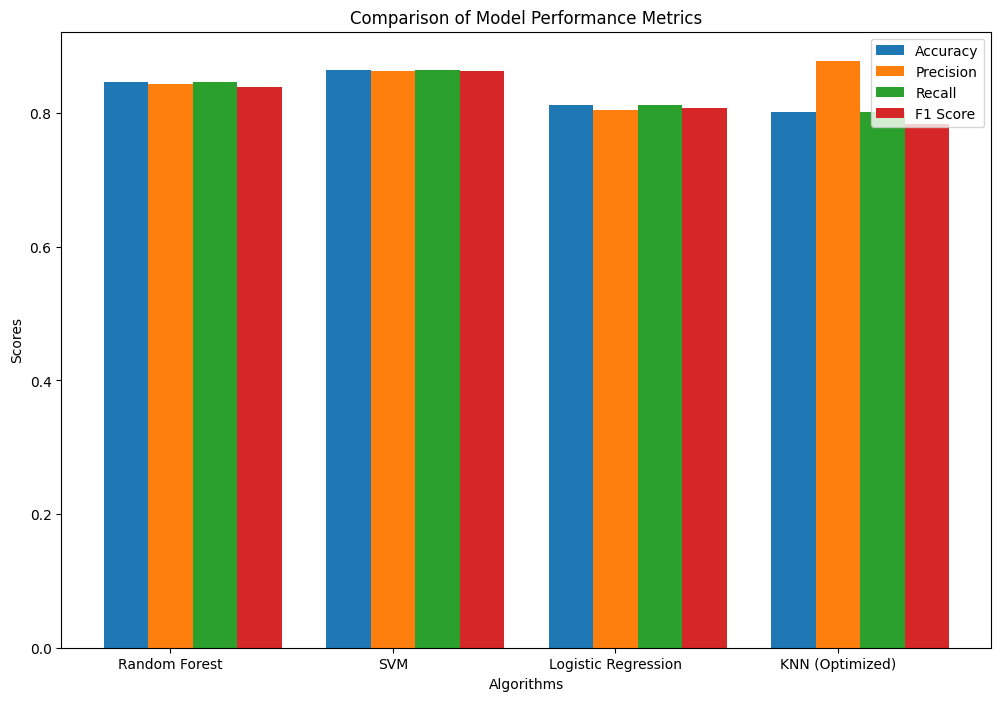


Upload a new unlabeled file for crime type prediction:


Saving test.txt to test.txt

Prediction for uploaded file 'test.txt':

Random Forest Predicted Crime Type: Abuse
Accuracy: 0.85
Precision: 0.84
Recall: 0.85
F1-Score: 0.84

SVM Predicted Crime Type: Rape
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1-Score: 0.86

Logistic Regression Predicted Crime Type: Sexual
Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1-Score: 0.81

KNN (Optimized) Predicted Crime Type: Rape
Accuracy: 0.80
Precision: 0.88
Recall: 0.80
F1-Score: 0.78


In [9]:
import os
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from google.colab import files
import string
import pandas as pd
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

nltk.download('punkt', download_dir='/root/nltk_data')
nltk.download('averaged_perceptron_tagger', download_dir='/root/nltk_data')
nltk.download('averaged_perceptron_tagger_eng', download_dir='/root/nltk_data')
nltk.data.path.append('/root/nltk_data')
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

def extract_verbs(text):
    tokens = tokenizer.tokenize(text)
    pos_tags = pos_tag(tokens)
    verbs = [word.lower().strip(string.punctuation) for word, tag in pos_tags if tag.startswith('VB')]
    return " ".join(verbs)

def tune_logistic_regression(X_train, y_train):
    lr_params = {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['newton-cg', 'lbfgs', 'liblinear']
    }
    lr = LogisticRegression(random_state=42, max_iter=1000)
    grid_search = GridSearchCV(lr, lr_params, cv=5, scoring='f1_weighted')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_


folder_path = '/content/drive/MyDrive/Crime/data_for_tfidf'
labeled_data_path = '/content/clean_crime_dataset.csv'

clean_data = pd.read_csv(labeled_data_path)
verbs_dict = {}
labels = []

for idx, row in clean_data.iterrows():
    filename = row['Filename']
    crime_type = row['Crime_Type']
    file_path = os.path.join(folder_path, filename)

    if os.path.isfile(file_path):
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
        except UnicodeDecodeError:
            continue

        verbs = extract_verbs(text)
        verbs_dict[filename] = verbs
        labels.append(crime_type)

df = pd.DataFrame({'Filename': list(verbs_dict.keys()), 'Verbs': list(verbs_dict.values()), 'Label': labels})

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=2000, min_df=2, max_df=0.8)
X = vectorizer.fit_transform(df['Verbs'])
y = df['Label']

# Applied SMOTE for class imbalance
min_samples = y.value_counts().min()
k_neighbors = min(5, min_samples - 1)
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

logreg = tune_logistic_regression(X_train, y_train)

knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, knn_params, cv=5)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_

models = {
    'Random Forest': rf,
    'SVM': svm,
    'Logistic Regression': logreg,
    'KNN (Optimized)': best_knn
}

accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy_scores[model_name] = accuracy_score(y_test, y_pred)
    precision_scores[model_name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[model_name] = recall_score(y_test, y_pred, average='weighted')
    f1_scores[model_name] = f1_score(y_test, y_pred, average='weighted')

plt.figure(figsize=(12, 8))
x = np.arange(len(models))
width = 0.2

plt.bar(x - width, accuracy_scores.values(), width, label='Accuracy')
plt.bar(x, precision_scores.values(), width, label='Precision')
plt.bar(x + width, recall_scores.values(), width, label='Recall')
plt.bar(x + 2*width, f1_scores.values(), width, label='F1 Score')

plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance Metrics')
plt.xticks(x, models.keys())
plt.legend()
plt.show()


def predict_unlabeled_file():
    print("\nUpload a new unlabeled file for crime type prediction:")
    uploaded_file = files.upload()

    for filename, content in uploaded_file.items():
        new_text = content.decode('utf-8')
        new_verbs = extract_verbs(new_text)
        new_verbs_vector = vectorizer.transform([new_verbs])

        print(f"\nPrediction for uploaded file '{filename}':")

        for model_name, model in models.items():
            pred = model.predict(new_verbs_vector)[0]
            accuracy = accuracy_score(y_test, model.predict(X_test))
            precision = precision_score(y_test, model.predict(X_test), average='weighted')
            recall = recall_score(y_test, model.predict(X_test), average='weighted')
            f1 = f1_score(y_test, model.predict(X_test), average='weighted')

            print(f"\n{model_name} Predicted Crime Type: {pred}")
            print(f"Accuracy: {accuracy:.2f}")
            print(f"Precision: {precision:.2f}")
            print(f"Recall: {recall:.2f}")
            print(f"F1-Score: {f1:.2f}")

predict_unlabeled_file()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


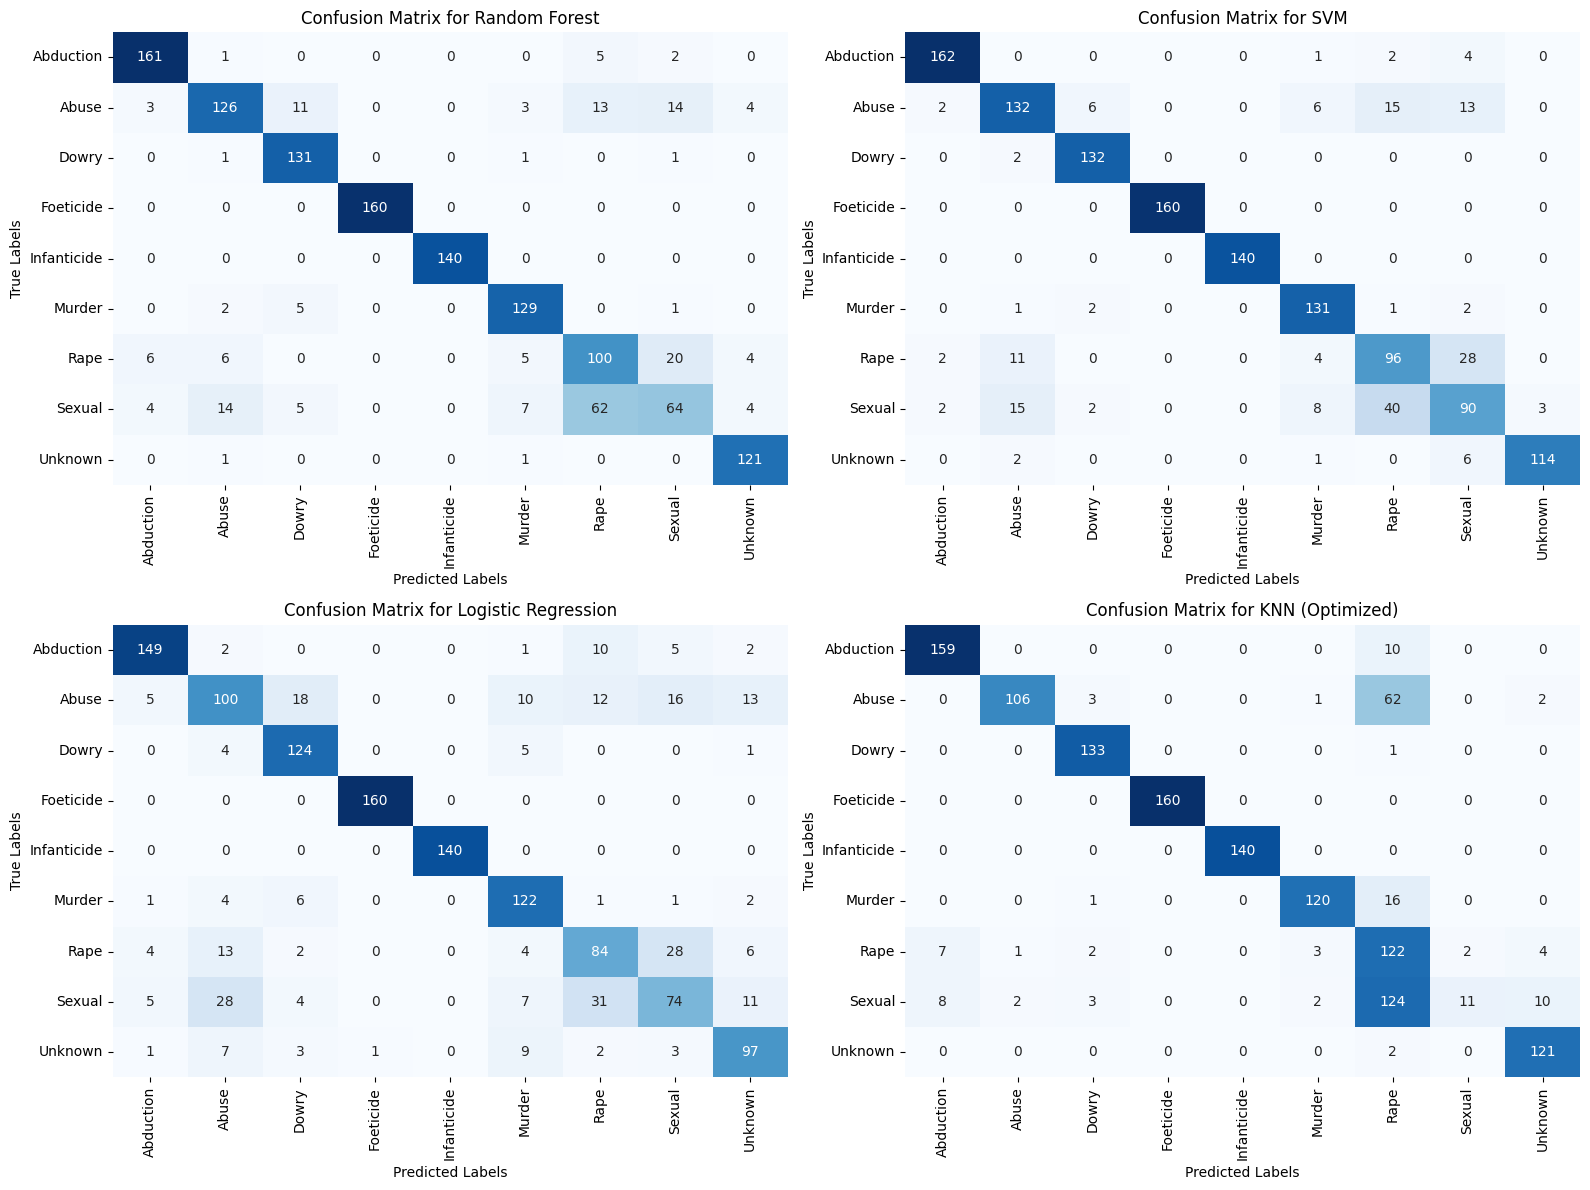


Model Performance Metrics:

Random Forest:
  Accuracy: 0.85
  Precision: 0.84
  Recall: 0.85
  F1 Score: 0.84

SVM:
  Accuracy: 0.86
  Precision: 0.86
  Recall: 0.86
  F1 Score: 0.86

Logistic Regression:
  Accuracy: 0.78
  Precision: 0.78
  Recall: 0.78
  F1 Score: 0.78

KNN (Optimized):
  Accuracy: 0.80
  Precision: 0.88
  Recall: 0.80
  F1 Score: 0.78


In [10]:
import os
import nltk
nltk.download('punkt', force=True)
nltk.download('averaged_perceptron_tagger', force=True)
nltk.download('averaged_perceptron_tagger_eng', force=True)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import string
import pandas as pd
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('taggers/averaged_perceptron_tagger')
except LookupError:
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import TreebankWordTokenizer
from nltk import pos_tag
import string

tokenizer = TreebankWordTokenizer()

def extract_verbs(text):
    tokens = tokenizer.tokenize(text)
    pos_tags = pos_tag(tokens)
    verbs = [word.lower().strip(string.punctuation) for word, tag in pos_tags if tag.startswith('VB')]
    return verbs

folder_path = '/content/drive/MyDrive/Crime/data_for_tfidf'
labeled_data_path = '/content/clean_crime_dataset.csv'

clean_data = pd.read_csv(labeled_data_path)
verbs_dict = {}
labels = []

for idx, row in clean_data.iterrows():
    filename = row['Filename']
    crime_type = row['Crime_Type']
    file_path = os.path.join(folder_path, filename)

    if os.path.isfile(file_path):
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
        except UnicodeDecodeError:
            continue

        verbs = extract_verbs(text)
        # Join the verbs into a single string before storing in the dictionary
        verbs_dict[filename] = " ".join(verbs)
        labels.append(crime_type)

df = pd.DataFrame({'Filename': list(verbs_dict.keys()), 'Verbs': list(verbs_dict.values()), 'Label': labels})

# Vectorized
vectorizer = TfidfVectorizer(max_features=2000, min_df=2, max_df=0.8)
X = vectorizer.fit_transform(df['Verbs'])
y = df['Label']

# Applied SMOTE
min_samples = y.value_counts().min()
k_neighbors = min(5, min_samples - 1)
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
logreg = LogisticRegression(max_iter=1000, random_state=42)

knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, knn_params, cv=5)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_

models = {
    'Random Forest': rf,
    'SVM': svm,
    'Logistic Regression': logreg,
    'KNN (Optimized)': best_knn
}

accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

plt.figure(figsize=(16, 12))

for i, (model_name, model) in enumerate(models.items(), start=1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy_scores[model_name] = accuracy_score(y_test, y_pred)
    precision_scores[model_name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[model_name] = recall_score(y_test, y_pred, average='weighted')
    f1_scores[model_name] = f1_score(y_test, y_pred, average='weighted')

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 2, i)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')

plt.tight_layout()
plt.show()

print("\nModel Performance Metrics:")
for model_name in models.keys():
    print(f"\n{model_name}:")
    print(f"  Accuracy: {accuracy_scores[model_name]:.2f}")
    print(f"  Precision: {precision_scores[model_name]:.2f}")
    print(f"  Recall: {recall_scores[model_name]:.2f}")
    print(f"  F1 Score: {f1_scores[model_name]:.2f}")

In [11]:
import pandas as pd
import os
import spacy
from tqdm import tqdm
import re

nlp = spacy.load("en_core_web_sm")
text_folder = "/content/drive/MyDrive/Crime/data_for_tfidf"
csv_path = "/content/clean_crime_dataset.csv"
output_path = "/content/enriched_crime_dataset.csv"

df = pd.read_csv(csv_path)

people_list = []
places_list = []
orgs_list = []
dates_list = []
norp_list = []
loc_list = []

people_count = []
places_count = []
orgs_count = []
dates_count = []
norp_count = []
loc_count = []

blacklist_words = ['ipc', 'sho', 'station', 'police', 'court', 'section', 'harassment', 'fir']
crime_keywords = ['murder', 'rape', 'theft', 'robbery', 'harassment', 'molestation', 'assault', 'violence', 'dowry']

# ✅ Known Indian locations to exclude from person names
known_locations = set([
    'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'chhattisgarh', 'goa',
    'gujarat', 'haryana', 'himachal pradesh', 'jharkhand', 'karnataka', 'kerala',
    'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
    'odisha', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana', 'tripura',
    'uttar pradesh', 'uttarakhand', 'west bengal', 'andaman and nicobar islands',
    'chandigarh', 'dadra and nagar haveli', 'daman and diu', 'delhi', 'jammu and kashmir',
    'ladakh', 'lakshadweep', 'puducherry'
])

def clean_entity(ent):
    ent = re.sub(r'\s+', ' ', ent).strip()
    return ent

def is_crime_term(name):
    return any(term in name.lower() for term in crime_keywords)

def is_valid_person(name):
    name = name.strip()
    if len(name.split()) > 4:
        return False
    if re.search(r'\d{4}', name):
        return False
    if re.search(r'\b(?:jan|feb|mar|apr|may|jun|jul|aug|sep|sept|oct|nov|dec)\b', name.lower()):
        return False
    if re.search(r'\b\d{1,2}\b', name):
        return False
    if any(word in name.lower() for word in blacklist_words):
        return False
    if is_crime_term(name):
        return False
    return True

def is_valid_org(name):
    name = name.strip()
    if len(name.split()) == 1 and name.istitle():
        return False
    if re.search(r'\d{4}', name) or re.search(r'\bsep\b|\baug\b|\bjan\b', name.lower()):
        return False
    if any(word in name.lower() for word in blacklist_words):
        return False
    if is_crime_term(name):
        return False
    return True

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="🔍 Processing files"):
    filename = row['Filename']
    file_path = os.path.join(text_folder, filename)

    try:
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
        except UnicodeDecodeError:
            with open(file_path, 'r', encoding='windows-1252') as file:
                text = file.read()

        doc = nlp(text)

        gpe_entities = set([clean_entity(ent.text) for ent in doc.ents if ent.label_ == "GPE"])
        loc_entities = set([clean_entity(ent.text) for ent in doc.ents if ent.label_ == "LOC"])
        norp_entities = set([clean_entity(ent.text) for ent in doc.ents if ent.label_ == "NORP"])
        all_location_entities = gpe_entities.union(loc_entities).union(norp_entities)

        persons = list(set([
            clean_entity(ent.text) for ent in doc.ents
            if ent.label_ == "PERSON"
            and is_valid_person(ent.text)
            and clean_entity(ent.text).lower() not in [loc.lower() for loc in all_location_entities]
            and clean_entity(ent.text).lower() not in known_locations
        ]))

        places = list(gpe_entities)
        orgs = list(set([
            clean_entity(ent.text) for ent in doc.ents
            if ent.label_ == "ORG" and is_valid_org(ent.text)
        ]))
        dates = list(set([clean_entity(ent.text) for ent in doc.ents if ent.label_ == "DATE"]))
        norps = list(norp_entities)
        locs = list(loc_entities)

        people_list.append(persons)
        places_list.append(places)
        orgs_list.append(orgs)
        dates_list.append(dates)
        norp_list.append(norps)
        loc_list.append(locs)

        people_count.append(len(persons))
        places_count.append(len(places))
        orgs_count.append(len(orgs))
        dates_count.append(len(dates))
        norp_count.append(len(norps))
        loc_count.append(len(locs))

    except Exception as e:
        print(f"⚠️ Error reading file {file_path}: {e}")
        people_list.append([]); people_count.append(0)
        places_list.append([]); places_count.append(0)
        orgs_list.append([]); orgs_count.append(0)
        dates_list.append([]); dates_count.append(0)
        norp_list.append([]); norp_count.append(0)
        loc_list.append([]); loc_count.append(0)

df['People'] = people_list
df['Places'] = places_list
df['Organizations'] = orgs_list
df['Dates'] = dates_list
df['NORP'] = norp_list
df['Locations'] = loc_list

df['People_Count'] = people_count
df['Places_Count'] = places_count
df['Organizations_Count'] = orgs_count
df['Dates_Count'] = dates_count
df['NORP_Count'] = norp_count
df['Locations_Count'] = loc_count

df.to_csv(output_path, index=False)
print(f"\n✅ NER enriched dataset saved to: {output_path}")


🔍 Processing files: 100%|██████████| 5929/5929 [05:08<00:00, 19.24it/s]



✅ NER enriched dataset saved to: /content/enriched_crime_dataset.csv


In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from tqdm import tqdm
import time

df = pd.read_csv('/content/clean_crime_dataset.csv')

geolocator = Nominatim(user_agent="crime_mapper", timeout=10)

unique_locations = df['Location'].dropna().unique()
location_cache = {}

print("🔍 Geocoding unique locations...")

for loc in tqdm(unique_locations):
    try:
        location = geolocator.geocode(loc)
        if location:
            location_cache[loc] = (location.latitude, location.longitude)
        else:
            location_cache[loc] = (None, None)
        time.sleep(0.6)
    except GeocoderTimedOut:
        location_cache[loc] = (None, None)

df['Latitude'] = df['Location'].map(lambda x: location_cache.get(x, (None, None))[0])
df['Longitude'] = df['Location'].map(lambda x: location_cache.get(x, (None, None))[1])

df = df.dropna(subset=['Latitude', 'Longitude'])

crime_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)
heat_data = df[['Latitude', 'Longitude']].values.tolist()
HeatMap(heat_data).add_to(crime_map)

crime_map.save("crime_heatmap.html")
print("✅ Crime heatmap saved as 'crime_heatmap.html'")


🔍 Geocoding unique locations...


 62%|██████▏   | 467/755 [07:49<04:47,  1.00it/s]

In [ ]:
from google.colab import files
files.download("crime_heatmap.html")


In [ ]:
import pandas as pd
import gradio as gr

crime_df = pd.read_csv("/content/clean_crime_dataset.csv")

crime_df['Date'] = pd.to_datetime(crime_df['Date'], errors='coerce')

unique_locations = sorted(crime_df["Location"].dropna().unique())
unique_crime_types = sorted(crime_df["Crime_Type"].dropna().unique())

def filter_crime_data(location=None, start_date=None, end_date=None, crime_type=None):
    try:
        df = crime_df.copy()

        if location:
            df = df[df["Location"].str.lower() == location.lower()]

        if start_date:
            start_date = pd.to_datetime(start_date, errors='coerce')
            df = df[df["Date"] >= start_date]
        if end_date:
            end_date = pd.to_datetime(end_date, errors='coerce')
            df = df[df["Date"] <= end_date]

        if crime_type:
            df = df[df["Crime_Type"].str.lower() == crime_type.lower()]

        status_msg = f"✅ {len(df)} record(s) found."
        return status_msg, df
    except Exception as e:
        return f"❌ Error: {str(e)}", pd.DataFrame()

with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("🔎 **Crime Chatbot - Filter by Location, Date, and Crime Type**")

    with gr.Row():
        location = gr.Dropdown(label="Select Area", choices=unique_locations, interactive=True)
        start_date = gr.Textbox(label="Start Date (YYYY-MM-DD)", placeholder="Optional")
        end_date = gr.Textbox(label="End Date (YYYY-MM-DD)", placeholder="Optional")
        crime_type = gr.Dropdown(label="Crime Type", choices=[""] + unique_crime_types, interactive=True)

    status = gr.Textbox(label="Status", interactive=False)

    with gr.Row():
        filtered_output = gr.Dataframe(label="Filtered Output")

    filter_button = gr.Button("🔍 Apply Filter")

    filter_button.click(
        fn=filter_crime_data,
        inputs=[location, start_date, end_date, crime_type],
        outputs=[status, filtered_output]
    )

demo.launch()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import gradio as gr

# Load and prepare dataset
df = pd.read_csv("/content/enriched_crime_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)

# Function to generate graphs
def generate_graph(view_by, value):
    if view_by == 'Overall':
        # Crime Type Distribution
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, y='Crime_Type', order=df['Crime_Type'].value_counts().index, palette="viridis")
        plt.title("Crime Type Distribution")
        plt.xlabel("Count")
        plt.ylabel("Crime Type")
        plt.tight_layout()
        return plt.gcf()

    elif view_by == 'Year':
        filtered = df[df['Year'] == int(value)]
        crime_by_month = filtered.groupby('YearMonth').size().reset_index(name='Count')
        fig = px.line(crime_by_month, x='YearMonth', y='Count', title=f"Monthly Crime Trend in {value}",
                      markers=True, template='plotly_dark')
        return fig

    elif view_by == 'Crime Type':
        filtered = df[df['Crime_Type'] == value]
        crimes_by_year = filtered.groupby('Year').size().reset_index(name='Count')
        fig = px.bar(crimes_by_year, x='Year', y='Count', title=f"{value} Crime Count by Year",
                     template='plotly_dark')
        return fig

# Dropdown logic
def get_dropdown(view_by):
    if view_by == 'Year':
        return gr.update(choices=sorted(df['Year'].dropna().unique().astype(str)), visible=True, label="Select Year")
    elif view_by == 'Crime Type':
        return gr.update(choices=sorted(df['Crime_Type'].dropna().unique()), visible=True, label="Select Crime Type")
    else:
        return gr.update(visible=False)

# Gradio interface
with gr.Blocks() as demo:
    gr.Markdown("## 📊 Crime Data Visualizer")

    view_by = gr.Radio(["Overall", "Year", "Crime Type"], label="View By", value="Overall")
    value_input = gr.Dropdown(visible=False)
    plot_output = gr.Plot()

    view_by.change(fn=get_dropdown, inputs=view_by, outputs=value_input)
    view_by.change(fn=generate_graph, inputs=[view_by, value_input], outputs=plot_output)
    value_input.change(fn=generate_graph, inputs=[view_by, value_input], outputs=plot_output)

demo.launch()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
from collections import Counter
import ast

# Load dataset
df = pd.read_csv("/content/enriched_crime_dataset.csv")

# Helper: Safe list parser
def safe_eval(val):
    try:
        parsed = ast.literal_eval(val)
        return parsed if isinstance(parsed, list) else []
    except:
        return []

# Safely convert People, Places, Organizations columns
df['People'] = df['People'].fillna("[]").apply(safe_eval)
df['Places'] = df['Places'].fillna("[]").apply(safe_eval)
df['Organizations'] = df['Organizations'].fillna("[]").apply(safe_eval)

# Plot 1: Average NER entity counts per crime type
def plot_avg_ner():
    ner_avg = df.groupby('Crime_Type')[['People_Count', 'Places_Count', 'Organizations_Count']].mean().reset_index()
    ner_avg = ner_avg.sort_values(by='People_Count', ascending=False)

    plt.figure(figsize=(12,6))
    ner_avg.plot(x='Crime_Type', kind='bar', stacked=False, colormap='Set2')
    plt.title("Average NER Entity Counts per Crime Type")
    plt.ylabel("Average Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    return plt.gcf()

# Plot 2: Top 15 People/Places/Organizations
def plot_top_entities(entity_type):
    if entity_type == "People":
        data = [item for sublist in df['People'] for item in sublist]
    elif entity_type == "Places":
        data = [item for sublist in df['Places'] for item in sublist]
    elif entity_type == "Organizations":
        data = [item for sublist in df['Organizations'] for item in sublist]
    else:
        data = []

    top_items = Counter(data).most_common(15)
    if not top_items:
        plt.figure(figsize=(6,3))
        plt.text(0.5, 0.5, 'No data available', ha='center', va='center', fontsize=14)
        return plt.gcf()

    labels, values = zip(*top_items)
    plt.figure(figsize=(10,5))
    sns.barplot(x=list(values), y=list(labels), palette='rocket')
    plt.title(f"Top {entity_type} Entities")
    plt.xlabel("Frequency")
    plt.ylabel(entity_type)
    plt.tight_layout()
    return plt.gcf()

# Main handler
def render_plot(option):
    if option == "Average Entity Count per Crime Type":
        return plot_avg_ner()
    else:
        return plot_top_entities(option.split(" ")[1])  # Extract People/Places/Organizations

# Gradio interface
with gr.Blocks() as demo:
    gr.Markdown("## 🧠 NER-Based Crime Analysis")
    radio = gr.Radio(
        choices=[
            "Average Entity Count per Crime Type",
            "Top People Entities",
            "Top Places Entities",
            "Top Organizations Entities"
        ],
        label="Select View", value="Average Entity Count per Crime Type"
    )
    out = gr.Plot()

    radio.change(fn=render_plot, inputs=radio, outputs=out)

demo.launch()
